## Web Capstone Project:

### Scraped website - Flipkart.com
### Scraped product - Mobile phones

In [6]:
import requests
from bs4 import BeautifulSoup

In [7]:
flipkart_data=[]
for i in range(0,10):
    # Looping Through 10 Pages as at the Link remains the same only the Page number gets changes
    link = "https://www.flipkart.com/search?q=mobiles&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=off&as=off&page=%d" % (i+1)
    page=requests.get(link)
    dataflipkart=BeautifulSoup(page.text,"html.parser")
    # Getting The common Div Class which stores the Mobile Information
    for a in dataflipkart.findAll('div', attrs={'class':'_3pLy-c row'}):
        flipkart_temp={}
        # Getting the Mobile Name
        name=a.find('div', attrs={'class':'_4rR01T'})
        flipkart_temp['MobileName']=name.text
        #Extracting the Company Name from Mobile
        flipkart_temp['CompanyName'] = flipkart_temp['MobileName'].split()[0]
        # Getting the Number of Stars that Mobile Has
        try:
            flipkart_temp['Stars']=a.find('div', attrs={'class':'_3LWZlK'}).text.strip()
        except AttributeError:
            flipkart_temp['Stars'] = 0
        #Getting the Ratings the Mobile has Got
        try:
            ratings=a.find('span',attrs={'class':'_2_R_DZ'}).text.strip()
            flipkart_temp['Ratings']=ratings.split()[0]
        except AttributeError:
            flipkart_temp['Ratings'] = 0
        #Getting the Reviews the Mobile has Got
        try:
            ratings=a.find('span',attrs={'class':'_2_R_DZ'}).text.strip()
            flipkart_temp['Reviews']=ratings.split()[3]
        except AttributeError:
            flipkart_temp['Reviews']=0
        #Getting the Discounted Price
        discountedprice=a.find('div',attrs={'class':'_30jeq3 _1_WHN1'}).text.strip()
        flipkart_temp['Discount_Price']=discountedprice.replace('₹','')
        #Getting the Actual Price
        try:
            flipkart_temp['Actual_Price'] = a.find('div',{'class':'_3I9_wc _27UcVY'}).text.replace('₹','').strip()
        except AttributeError:
            flipkart_temp['Actual_Price'] = flipkart_temp['Discount_Price']
        #Getting The Discount Provided by the Mobile Company
        try:
            flipkart_temp['Discount'] = a.find('div',{'class':'_3Ay6Sb'}).text.replace('% off','').strip()
        except AttributeError:
            flipkart_temp['Discount']=0
        
        #Appending the Details into a list
        flipkart_data.append(flipkart_temp)
print("Data Extraction Complete")

Data Extraction Complete


In [8]:
import pandas as pd
#Putting the List into a DataFrame
df = pd.DataFrame(flipkart_data)
df
#Extracting the Dataframe to a CSV File
df.to_csv('Flipkart_Data.csv')

## Exploratory Data Analysis (EDA)

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
#import your csv file
df = pd.read_csv('Flipkart_Data.csv')

In [11]:
# Dimensions of the dataset (MobileData) Rows X Columns
df.shape

(240, 9)

In [12]:
# Verify your dataset
df.head()

,Unnamed: 0,Actual_Price,CompanyName,Discount,Discount_Price,MobileName,Ratings,Reviews,Stars
0,0,"10,999",POCO,27,"7,999","POCO C3 (Matte Black, 64 GB)","45,661","2,762",4.3
1,1,"11,999",Realme,20,"9,499","Realme Narzo 20A (Victory Blue, 64 GB)","78,397","5,144",4.4
2,2,"11,999",Realme,20,"9,499","Realme Narzo 20A (Glory Silver, 64 GB)","78,397","5,144",4.4
3,3,"20,999",Samsung,21,"16,499","Samsung Galaxy F41 (Fusion Blue, 128 GB)","1,62,915","21,368",4.3
4,4,"9,999",POCO,30,"6,999","POCO C3 (Arctic Blue, 32 GB)","80,614","6,165",4.3


In [13]:
# To identify the type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
Unnamed: 0        240 non-null int64
Actual_Price      240 non-null object
CompanyName       240 non-null object
Discount          240 non-null int64
Discount_Price    240 non-null object
MobileName        240 non-null object
Ratings           240 non-null object
Reviews           240 non-null object
Stars             240 non-null float64
dtypes: float64(1), int64(2), object(6)
memory usage: 17.0+ KB


In [14]:
df['Discount_Price'] = df['Discount_Price'].str.replace(',', '')
df['Ratings']= df['Ratings'].str.replace(',', '')
df['Actual_Price']= df['Actual_Price'].str.replace(',', '')

In [15]:
df['Discount_Price'] = df['Discount_Price'].astype('int')
df['Ratings'] = df['Ratings'].astype('int')
df['Actual_Price'] = df['Actual_Price'].astype('int')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
Unnamed: 0        240 non-null int64
Actual_Price      240 non-null int64
CompanyName       240 non-null object
Discount          240 non-null int64
Discount_Price    240 non-null int64
MobileName        240 non-null object
Ratings           240 non-null int64
Reviews           240 non-null object
Stars             240 non-null float64
dtypes: float64(1), int64(5), object(3)
memory usage: 17.0+ KB


In [17]:
# Get a quick statistical summary of the dataset
# Summary includes the mean, median, min, max and a few key percentiles for numeric columns
df.describe()

,Unnamed: 0,Actual_Price,Discount,Discount_Price,Ratings,Stars
count,240.00000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,119.50000,16118.879167,17.612500,13135.266667,71834.462500,4.281250
std,69.42622,8115.090547,8.068992,6815.806814,73726.206351,0.410763
min,0.00000,799.000000,0.000000,649.000000,0.000000,0.000000
25%,59.75000,11999.000000,15.000000,9499.000000,11932.750000,4.300000
50%,119.50000,15990.000000,19.000000,12990.000000,35921.000000,4.300000
75%,179.25000,19999.000000,21.000000,16492.250000,162915.000000,4.400000
max,239.00000,47900.000000,48.000000,38999.000000,343538.000000,4.600000


In [18]:
df.isnull().sum()

Unnamed: 0        0
Actual_Price      0
CompanyName       0
Discount          0
Discount_Price    0
MobileName        0
Ratings           0
Reviews           0
Stars             0
dtype: int64

In [19]:
# Calculate Average value of the ActualPrice across all mobiles
df[["CompanyName", "Actual_Price"]].groupby("CompanyName").mean()

,Actual_Price
CompanyName,
Apple,44150.000000
BlackZone,799.000000
Gionee,7990.000000
Google,31999.000000
Honor,7999.000000
Infinix,12735.842105
Itel,7399.000000
Lava,1104.833333
Micromax,2499.000000


/Users/samparna_sona/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/samparna_sona/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'cmaps'
  s)


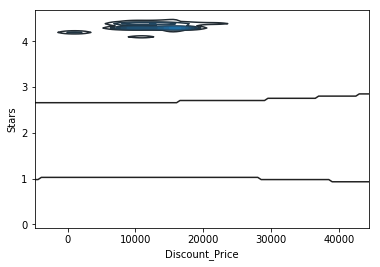

In [20]:
#Bivariate Analysis by discounted price vs actual price
sns.kdeplot(df.Discount_Price, df.Stars,shade=False,cmaps='Yellow')

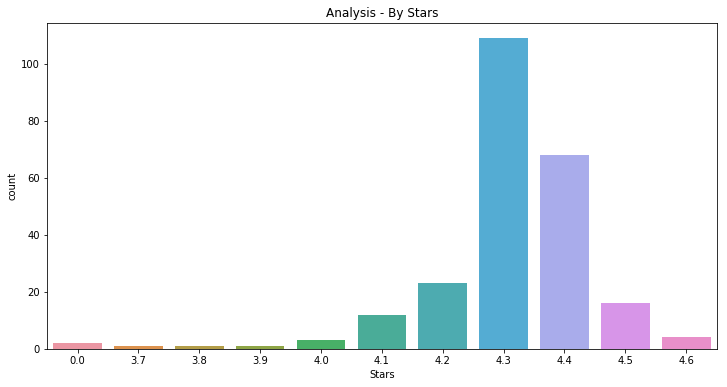

In [21]:
fig = plt.figure(figsize = (12,6))
sns.countplot(df['Stars'])
plt.title("Analysis - By Stars")
plt.show()


Observation:¶
- The satisfied customers showed interest give ratings and given majority of them above 4
- 4.3 is given for a greater number of mobile phones

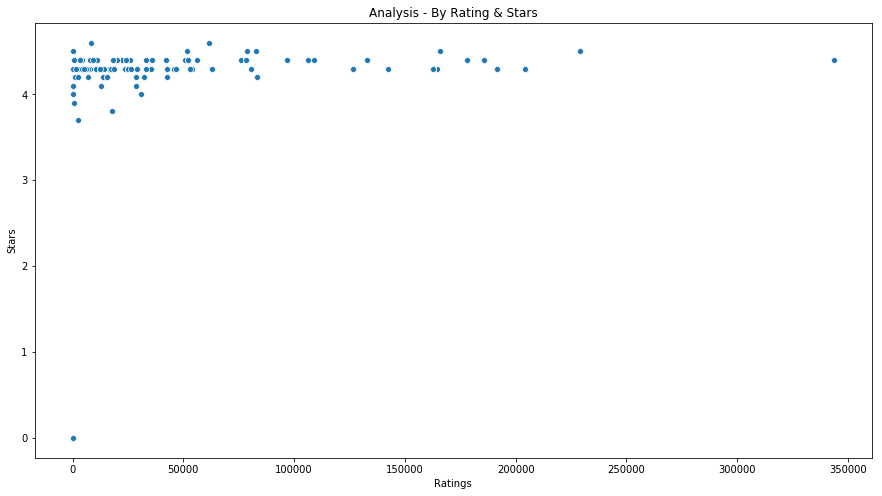

In [25]:
fig = plt.figure(figsize = (15,8))
sns.scatterplot(x = 'Ratings', y = 'Stars', data = df)
plt.title("Analysis - By Rating & Stars")
plt.show()

Observation:
- Most of the Mobiles phones are rated between 4 and 4.5
- Only few customers rated below 4 shows customer satisfaction

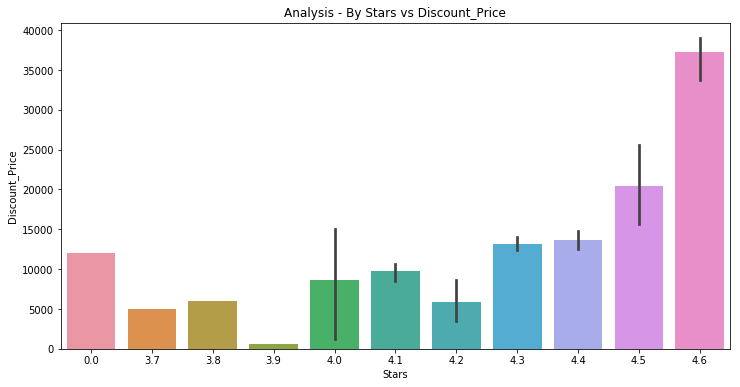

In [27]:
fig = plt.figure(figsize = (12,6))
sns.barplot(x="Stars",y="Discount_Price",data=df)
plt.title("Analysis - By Stars vs Discount_Price")
plt.show()

Observation
- Customers are more satisfied with Costlier mobile-phones. 
- Costlier the product(Mobile),Increase in the star rating.

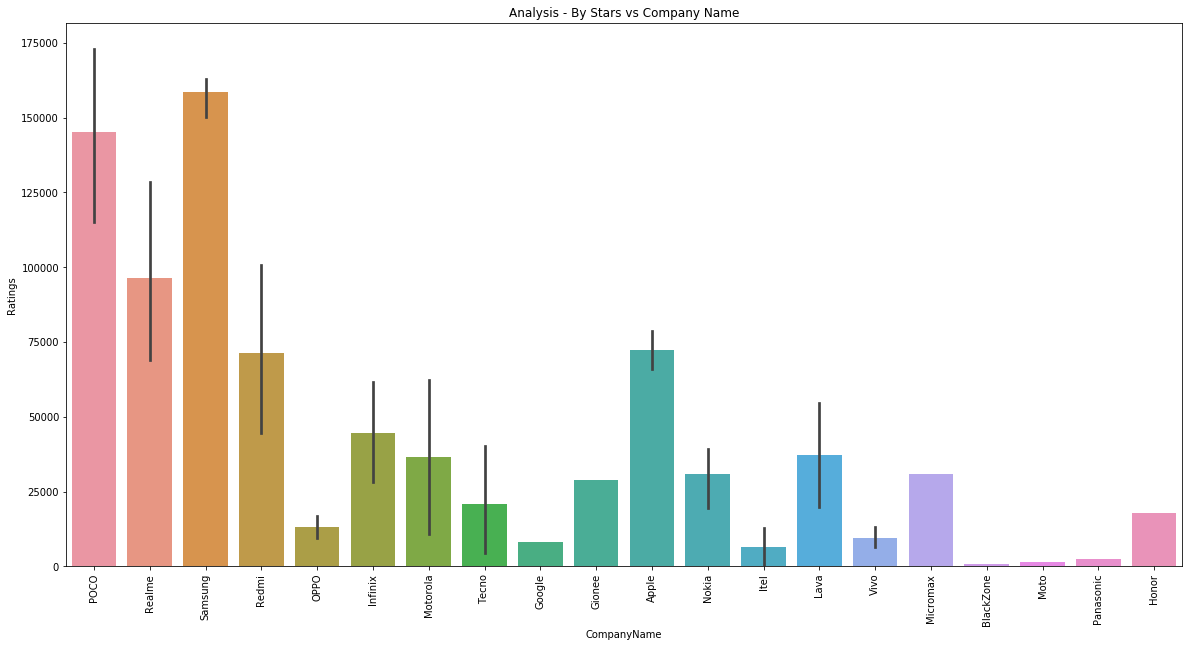

In [31]:
fig = plt.figure(figsize = (20,10))
sns.barplot(y="Ratings",x="CompanyName",data=df)
plt.xticks(rotation=90)
plt.title("Analysis - By Stars vs Company Name")
plt.show()

Observation:
- Samsung, Poco & Realme has received high number of Ratings.
- POCO brand is rated by most customers.

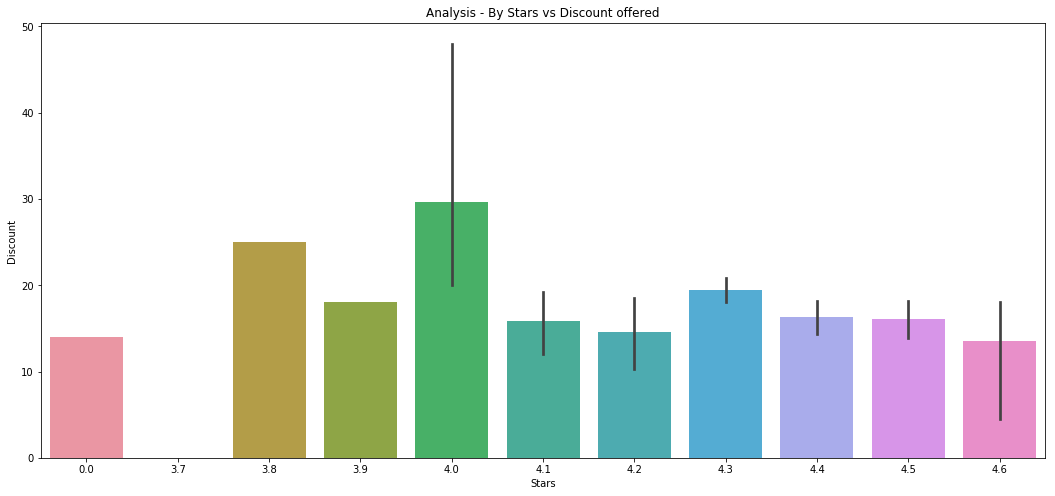

In [33]:
fig = plt.figure(figsize = (18,8))
sns.barplot(x="Stars",y="Discount",data=df)
plt.title("Analysis - By Stars vs Discount offered")
plt.show()

Observation:
-Discount is an impotant factor impacting Ratings.
-Discount is directy proportional to Ratings.

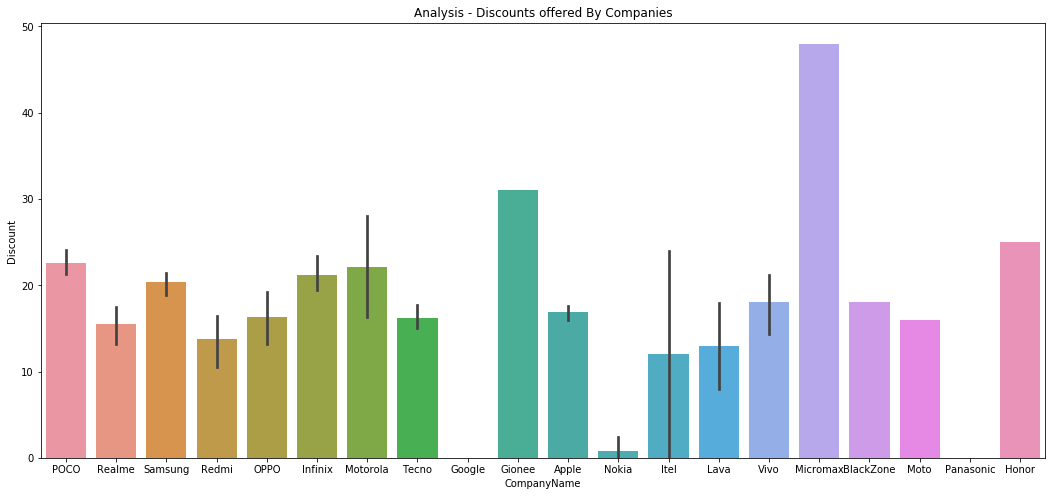

In [35]:
fig = plt.figure(figsize = (18,8))
sns.barplot(x="CompanyName",y="Discount",data=df)
plt.title("Analysis - Discounts offered By Companies")
plt.show()

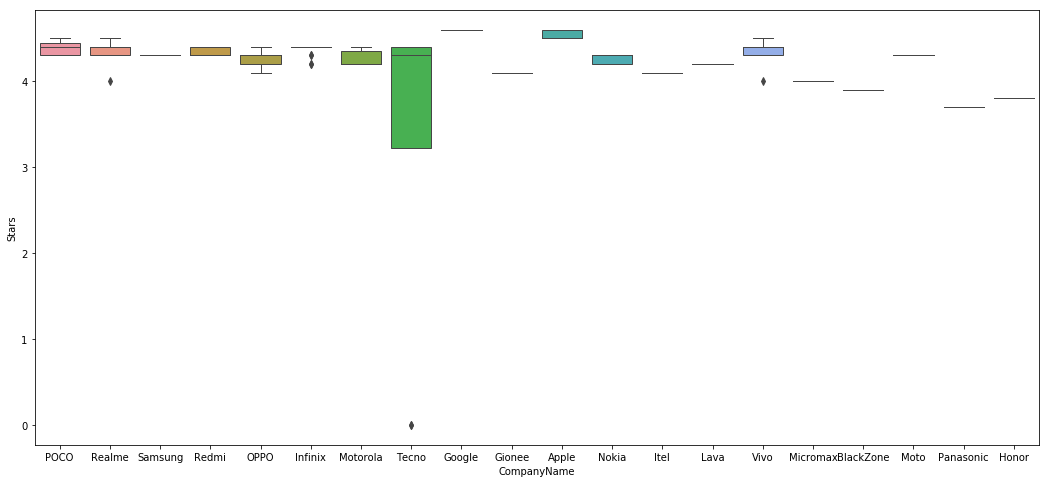

In [36]:
plt.figure(figsize=(18,8))

sns.boxplot(x='CompanyName',y='Stars',data=df,linewidth=1)

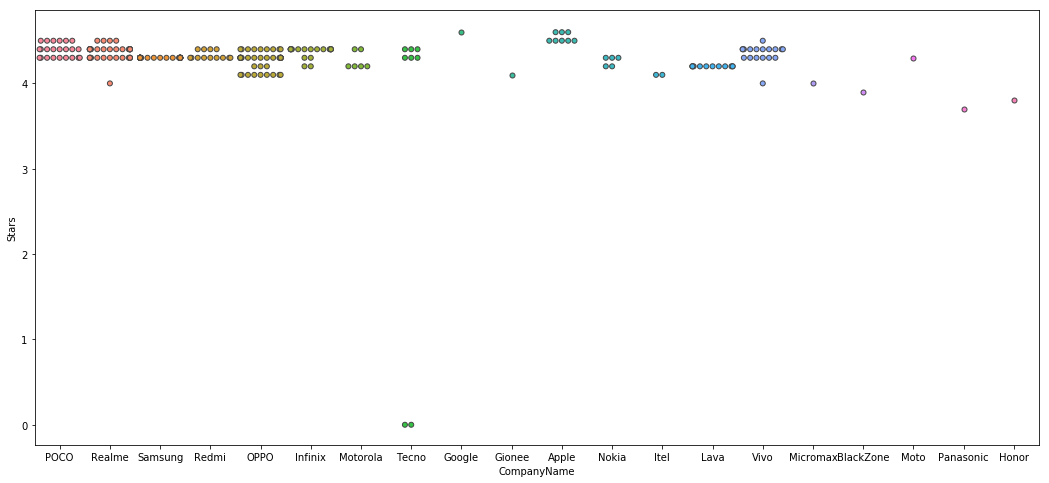

In [37]:
plt.figure(figsize=(18,8))
sns.swarmplot(x='CompanyName',y='Stars',data=df,linewidth=1)

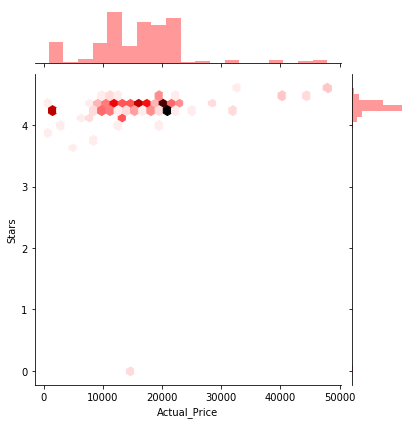

In [38]:
sns.jointplot(x='Actual_Price',y='Stars',data=df,color='red',kind='hex')

/Users/samparna_sona/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1440x1440 with 0 Axes>

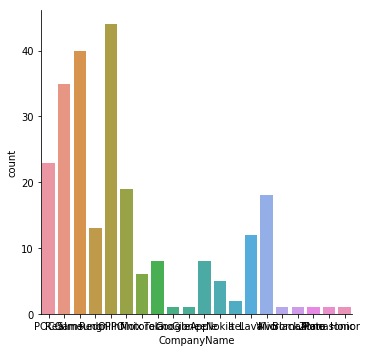

In [39]:
plt.figure(figsize=(20,20))
sns.factorplot('CompanyName',data=df,kind='count')

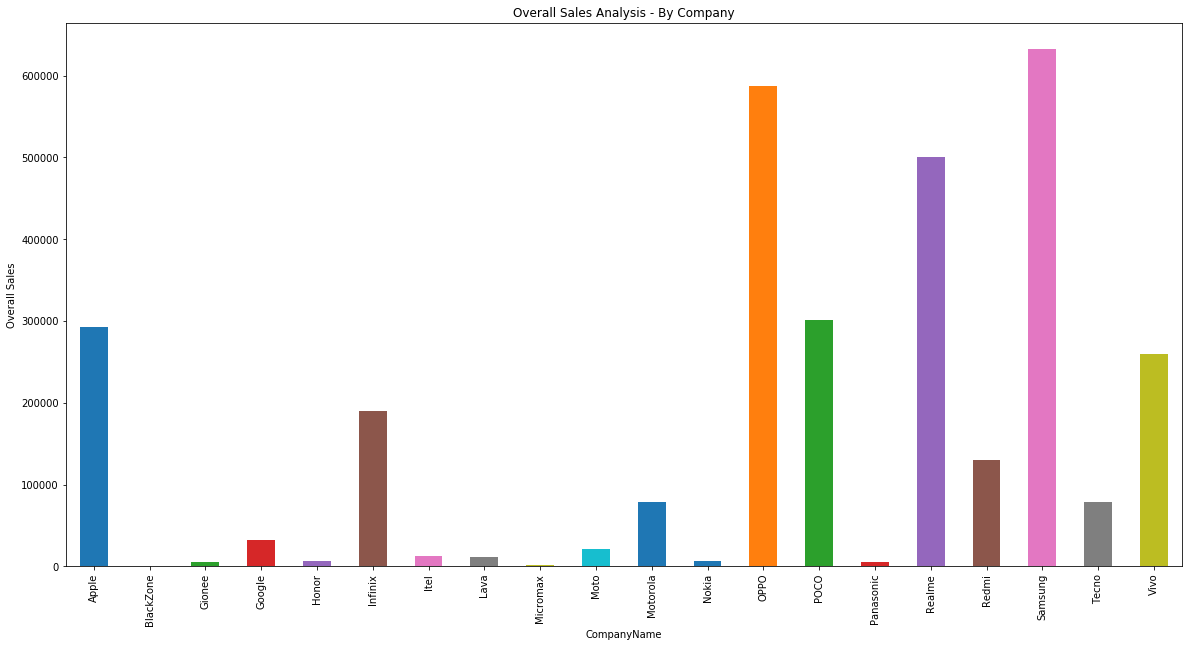

In [40]:
var = df.groupby('CompanyName').Discount_Price.sum()
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1,1,1)

ax1.set_title("Overall Sales Analysis - By Company")
ax1.set_xlabel('Company Names')
ax1.set_ylabel('Overall Sales')
var.plot(kind='bar')

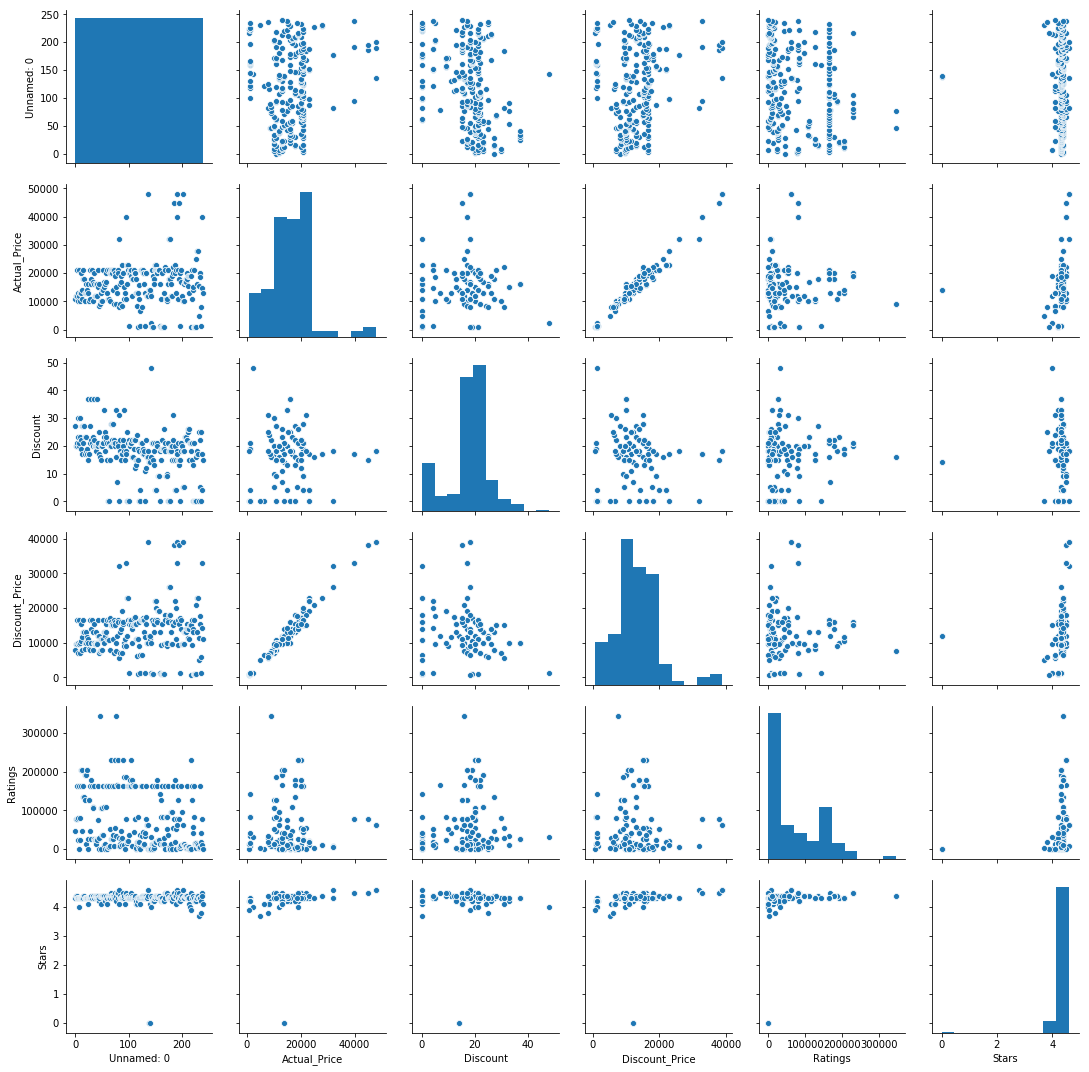

In [42]:
sns.pairplot(df)

### For example: If I have 25000 INR as my budget and company like Samsung from the group of phones

In [77]:
df2 =  df.query('CompanyName =="Samsung" & Discount_Price <=25000')

In [78]:
df2.shape

(10, 9)

In [79]:
df2.head()

,Unnamed: 0,Actual_Price,CompanyName,Discount,Discount_Price,MobileName,Ratings,Reviews,Stars
22,22,19999,Samsung,22,15499,"Samsung Galaxy F41 (Fusion Green, 64 GB)",162814,"21,363",4.3
49,49,19999,Samsung,22,15499,"Samsung Galaxy F41 (Fusion Blue, 64 GB)",162814,"21,363",4.3
52,52,20999,Samsung,21,16499,"Samsung Galaxy F41 (Fusion Blue, 128 GB)",162814,"21,363",4.3
89,89,20999,Samsung,21,16499,"Samsung Galaxy F41 (Fusion Black, 128 GB)",162814,"21,363",4.3
98,98,20999,Samsung,21,16499,"Samsung Galaxy F41 (Fusion Green, 128 GB)",162814,"21,363",4.3


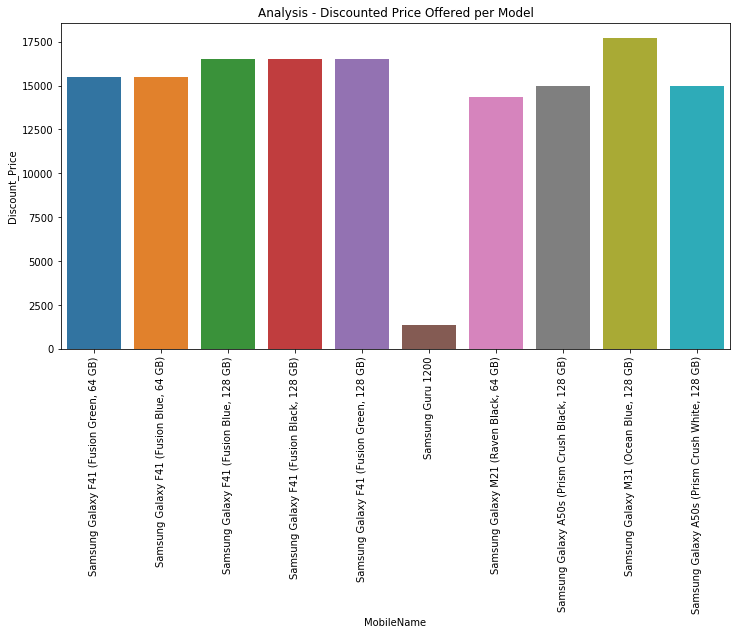

In [81]:
fig = plt.figure(figsize = (12,6))
sns.barplot(y="Discount_Price",x="MobileName",data=df2)
plt.xticks(rotation=90)
plt.title("Analysis - Discounted Price Offered per Model")
plt.show()

In [ ]:
Observation
- Based On discounted proce "Samsung F41" is the best choice.

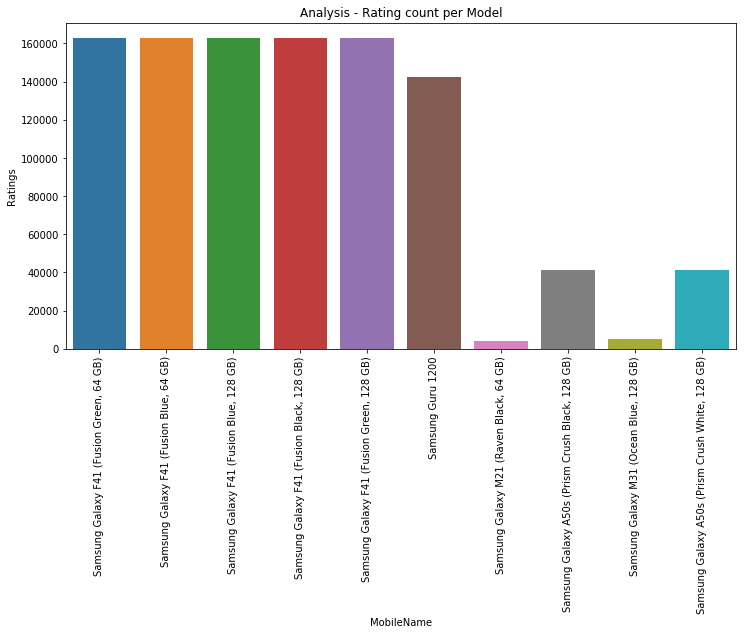

In [82]:
fig = plt.figure(figsize = (12,6))
sns.barplot(y="Ratings",x="MobileName",data=df2)
plt.xticks(rotation=90)
plt.title("Analysis - Rating count per Model")
plt.show()

In [ ]:
Observations:
- Rating of "Samsung F41" is more.(All colors)

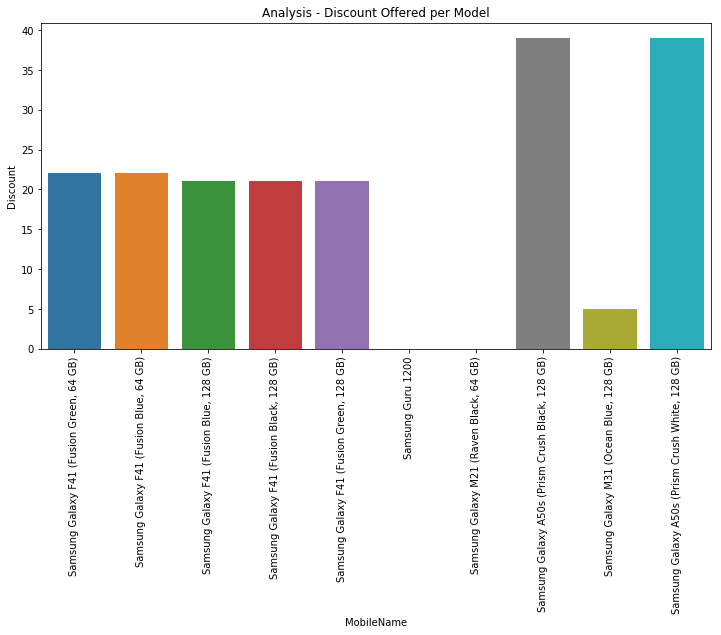

In [83]:
fig = plt.figure(figsize = (12,6))
sns.barplot(y="Discount",x="MobileName",data=df2)
plt.xticks(rotation=90)
plt.title("Analysis - Discount Offered per Model")
plt.show()

In [ ]:
Observation:
- Based on Customer Price, Rating and discount offered, 'Samsung Galaxy F41' would be best option available.